<h1 align='center'>Myanmar Supermarket Research Proposal</h1>

## Imports and DataFrame Initialization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('supermarket_sales.csv')

In [4]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


There is a dataset in the dataframe `df`, a general idea of its components is displayed above. 

## Dataset Description

The source of the dataset can be found here: https://www.kaggle.com/aungpyaeap/supermarket-sales
#### General Description:
This dataset contains a sample of historical purchase data for three supermarkets (of the same company) located in three different cities within Myanmar. The time range for this data is from January 1st, 2019 to March 9th, 2019. Along with information about each purchase, each row contains some additional general information about the customer as well as general information about the items purchased.
#### Attribute Information (from the source with some edits)
- Invoice ID: Computer generated sales slip invoice identification number
- Branch: Branch of supermarket (3 branches in dataset - A, B and C).
- City: Location of supermarket (3 cities in dataset - Yangon, Naypyitaw and Mandalay)
- Customer type: Type of customer, either a member (individual uses membership card) or normal (individual does not use membership card).
- Gender: Customer's gender
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel
- Unit price: Price of each product in dollars
- Quantity: Number of products purchased by customer
- Tax: 5% tax fee for purchase subtotal
- Total: Total price including tax
- Date: Date of purchase (Spanning from January 1st, 2019 to March 9th, 2019)
- Time: Purchase time (10am to 9pm)
- Payment: Payment used by customer for purchase (Cash, Credit Card or Ewallet)
- COGS: Cost of goods sold
- Gross margin percentage: Gross margin percentage (percent of purchase that is profitable)
- Gross income: Gross income (profitable income)
- Rating: Customer satisfaction rating on their overall shopping experience (On a scale of 1 to 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
Invoice ID                 1000 non-null object
Branch                     1000 non-null object
City                       1000 non-null object
Customer type              1000 non-null object
Gender                     1000 non-null object
Product line               1000 non-null object
Unit price                 1000 non-null float64
Quantity                   1000 non-null int64
Tax 5%                     1000 non-null float64
Total                      1000 non-null float64
Date                       1000 non-null object
Time                       1000 non-null object
Payment                    1000 non-null object
cogs                       1000 non-null float64
gross margin percentage    1000 non-null float64
gross income               1000 non-null float64
Rating                     1000 non-null float64
dtypes: float64(7), int64(1), object(9)
memory usage: 97.7+ KB


## Digging in - Exploratory Data Analysis

In [6]:
df.groupby('Customer type').Total.mean()

Customer type
Member    327.791305
Normal    318.122856
Name: Total, dtype: float64

In [7]:
cols = df.columns
cols_get_uniques = ['Branch',
                    'City',
                    'Customer type',
                    'Gender',
                    'Product line',
                    'Payment'
                    ]
for col in cols_get_uniques:
    print(col, df[col].unique())

Branch ['A' 'C' 'B']
City ['Yangon' 'Naypyitaw' 'Mandalay']
Customer type ['Member' 'Normal']
Gender ['Female' 'Male']
Product line ['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']
Payment ['Ewallet' 'Cash' 'Credit card']


- There are three branches - A, B and C
- There are three cities, all of which are in Myanmar - Yangon, Naypyitaw and Mandalay
- There are two types of customers - Members (people who used membership card) and Normal (people who did not use a membership card)
- There are two genders - Male and Female
- There are six product lines - Health and beauty; Electronic accessories; Home and lifestyle; Sports and travel; Food and beverages; Fashion accessories
- There are three payment types - Ewallet, Cash, Credit card

#### Are there different branches in each city?

In [8]:
df.groupby(['City','Branch'])['Invoice ID'].count()

City       Branch
Mandalay   B         332
Naypyitaw  C         328
Yangon     A         340
Name: Invoice ID, dtype: int64

**No.**\
There are three different branches and each one belongs to a particular city - so we can simplify this by just using the city names from now on. In other words, Branch A is the same as Yangon, Branch B is the same as Mandalay, and Branch C is the same as Naypyitaw.\
Alright, let's look closer at each city.

#### Digging deeper - city specific data

**Total Sales**

In [9]:
df.groupby('City').Total.sum()

City
Mandalay     106197.6720
Naypyitaw    110568.7065
Yangon       106200.3705
Name: Total, dtype: float64

Each branch has approximately the same sales total over the 3 month period in this sample.

**Bar graph breakdowns**

In [10]:
def city_bar(col):
    df.groupby(['City',col])['Invoice ID'].count().unstack().plot(kind='bar')
    plt.legend(bbox_to_anchor=(1, 1.05))
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.title('{} counts by City'.format(col))

The above is a function to create a generalized bar graph using `matplotlib.pyplot`.

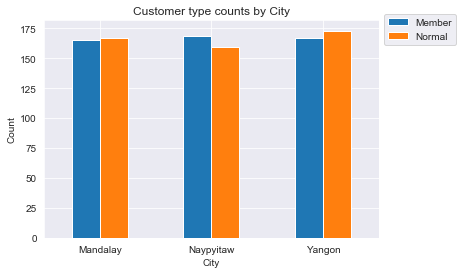

In [11]:
city_bar('Customer type')
plt.show()

Each city has approximately the same amount of transactions with members and without members.

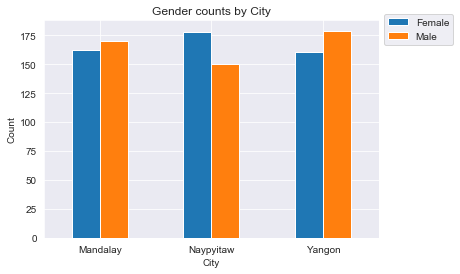

In [12]:
city_bar('Gender')
plt.show()

Gender breakdown is pretty even as well. Naypyitaw has more female than male customers, Yangon has more male, but Mandalay is practically 50/50. Even so, the greatest difference appears to be approximately 26 customers in Naypyitaw.

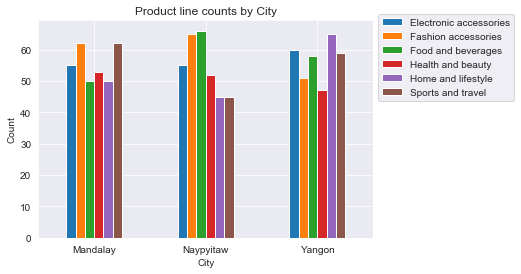

In [13]:
city_bar('Product line')
plt.show()

- It does appear there is some variation in the amount of purchases in each department depending on the city. 
- The greatest difference here is in Naypyitaw once again, where the Home and lifestyle/Sports and travel departments had about 20 less transactions than the food and beverage department.
- Perhaps the most interesting thing here is that each supermarket appears to have a decent influx of Electronic accessories purchases, that department is in the top three for each city.

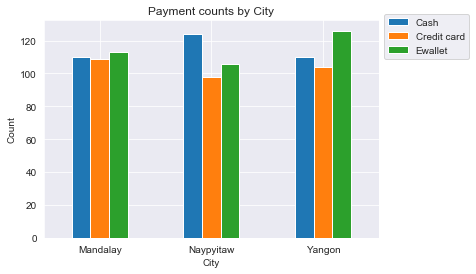

In [14]:
city_bar('Payment')
plt.show()

Relatively even here. Naypyitaw again appears to have the greatest difference between types of payment method.

Overall, each breakdown of customer demographics betweens cities is very similar. What if we break things down deeper and compare within those differences?

#### Even deeper - Members vs. Non-members

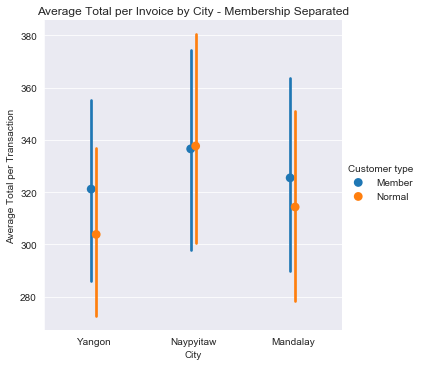

In [15]:
sns.catplot(x='City', y='Total', hue='Customer type', kind='point', dodge=True, join=False, data=df)
plt.ylabel('Average Total per Transaction')
plt.title('Average Total per Invoice by City - Membership Separated')
plt.show()

- Members appear to spend 15 to 20 more in Yangon and about 10 more in Mandalay
- The total is practically identical in Naypyitaw (ironic since it showed the most variation in customer demographics)
- It is safe to assume that in general, a member is more likely to spend more than a non-member

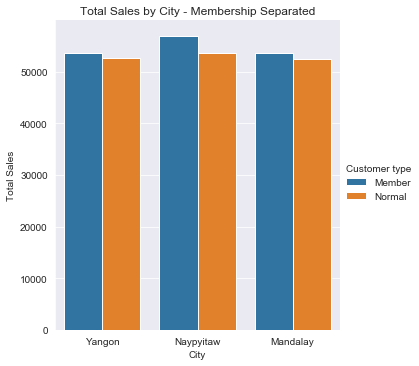

In [16]:
sns.catplot(x='City', y='Total', hue='Customer type', kind='bar', data=df, ci=False, estimator=sum)
plt.ylabel('Total Sales')
plt.title('Total Sales by City - Membership Separated')
plt.show()

The majority of sales come from members in all three cities, but not by a particularly large margin.

The average transaction for a member is generally higher than that of a non-member. It may be of interest to increase our membership numbers. What other factors could be in play here?

#### A look at ratings

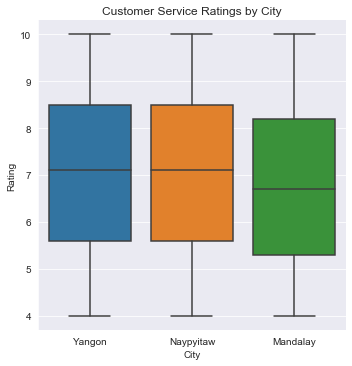

In [17]:
sns.catplot(x='City', y='Rating', data=df, kind='box')
plt.title('Customer Service Ratings by City')
plt.show()

Mandalay's satisfaction rating appears to be significantly worse than Yangon and Naypyitaw, why?\
Let's find out.

In [18]:
md_df = df[df.City == 'Mandalay']

In [19]:
md_df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.226,172.746,2/20/2019,13:27,Credit card,164.52,4.761905,8.226,5.9
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.896,60.816,2/6/2019,18:07,Ewallet,57.92,4.761905,2.896,4.5
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.102,107.142,3/9/2019,17:03,Cash,102.04,4.761905,5.102,6.8
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.116,590.436,1/15/2019,16:19,Cash,562.32,4.761905,28.116,4.5
19,319-50-3348,B,Mandalay,Normal,Female,Home and lifestyle,40.30,2,4.030,84.630,3/11/2019,15:30,Ewallet,80.60,4.761905,4.030,4.4


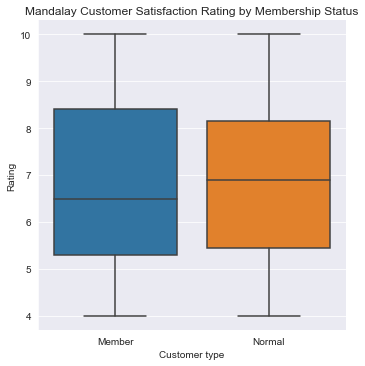

In [20]:
sns.catplot(x='Customer type', y='Rating', data=md_df, kind='box')
plt.title('Mandalay Customer Satisfaction Rating by Membership Status')
plt.show()

The member's rating variation is wider for sure - could this indicate a customer generally cares more about their experience at a store? Looks like the median is also lower than the Normal customer score. We can look at the same thing, but break it down further by gender.

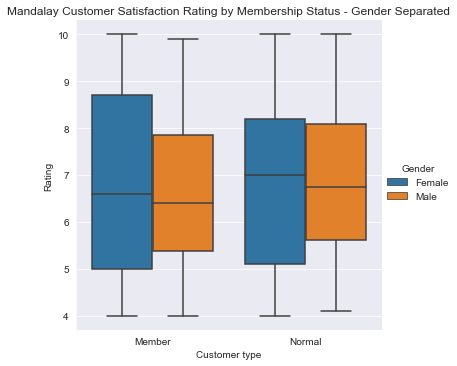

In [21]:
sns.catplot(x='Customer type', y='Rating', hue='Gender', data=md_df, kind='box')
plt.title('Mandalay Customer Satisfaction Rating by Membership Status - Gender Separated')
plt.show()

The breakdown for male and female looks very similar regardless of membership status - males tend to be a little more critical (lower scores overall), but also vary less.\
Females have a larger variation in their readings, with female members having the greatest variation in rating.

It could be of interest to hone in on membership satisfaction ratings in Mandalay, as members purchase more on average and that would ultimately affect this supermarket's bottom line.\
Let's look further into customer satisfaction.

#### Could it be a department problem in Mandalay?

In [22]:
non_md = df[df.City != 'Mandalay']

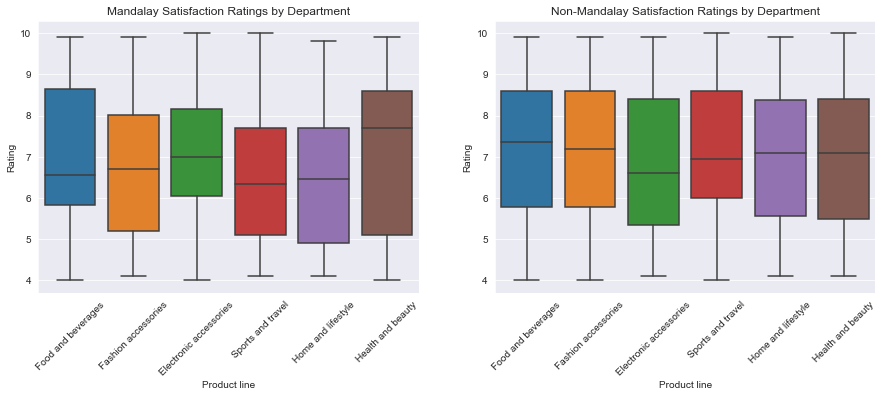

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5), sharex=False)
sns.catplot(x='Product line', y='Rating', data=md_df, kind='box', ax=ax[0])
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_title('Mandalay Satisfaction Ratings by Department')
sns.catplot(x='Product line', y='Rating', data=non_md, kind='box', ax=ax[1],
           order=['Food and beverages', 'Fashion accessories', 'Electronic accessories', 'Sports and travel', 'Home and lifestyle', 'Health and beauty'])
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_title('Non-Mandalay Satisfaction Ratings by Department')
plt.close(2)
plt.close(3)
plt.show()

Observations:
- Mandalay has a lower median in all departments except Electronic Accessories and Health and Beauty
- Mandalay's main pain points when it comes to customer satisfaction appear to be Sports and travel as well as Home and Lifestyle
- Mandalay's Electronic accessories department scores relatively well and more consistently than any other department

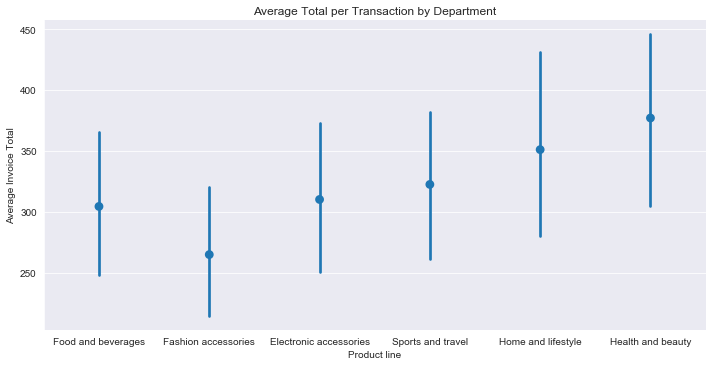

In [24]:
sns.catplot(x='Product line', y='Total', data=md_df, kind='point', height=5, aspect=2, join=False)
plt.ylabel('Average Invoice Total')
plt.title('Average Total per Transaction by Department')
plt.show()

- Mandalay's average sales totals for the Home and lifestyle and Sports and travel departments have the 2nd and 3rd highest sales per transaction, respectively.
- Mandalay's lowest scores for customer satisfaction also fall within those two departments.

## Research Proposal

#### The problem (opportunity)

The primary problem, or rather opportunity, is that the supermarket in Mandalay has relatively low customer satisfaction ratings. From the above analysis, it would follow that members are the primary concern when it comes to sales average. This means that it would be of particular concern to not only increase our customer satisfaction ratings, but also increase the number of membership invoices. It also follows that increasing members will generally lead to more sales and customers overall. So what is the overall problem?

**How can these supermarkets (particularly Mandalay's) increase membership invoices while also increasing customer satisfaction?**

#### Potential solution

Introduce a new "spend and save" program to supermarket members in order to entice non-members to become members and to increase member satisfaction.

#### The method - What?

**Spend and Save Program**

Essentially, this program will reward members who purchase items with points for every dollar spent. The average customer spends approximately \\$325 per transaction in these supermarkets. This is primarily a bulk shopping market. Once a customer reaches \\$100 in spending they will be alloted \\$10 to spend on a purchase of their choosing. If they spend \\$200 then they'll have \\$20 to spend, \\$300 and \\$30 and so on up until the cap of \\$1000 and \\$100 for a single transaction. Essentially this is a 10\% discount every \\$100 spent ***for a future visit***. These points can be stacked (i.e. you can save your \\$10 until it is \\$20); however, a maximum of \\$100 can be used at any one time - in order to avoid too much sales loss in a single transaction. When using points on a purchase, the customer will not receive any points from that transaction.

Essentially this is a 'gift' program for shopping at this supermarket, and hopefully it will entice more individuals to become a member and also drive further customer satisfaction.

#### The method - How?

Now that the details of how the program works is defined, how do we test it? Since Mandalay is the main city of interest (least to lose and most to gain) and has the lowest customer service ratings, we will roll the program out here first. As for when it should roll out, it would make the most sense to roll it out at the beginning of 2020 from January to March, as the sample we have goes from January through March, to avoid seasonality bias in the data. From the data collected over the three month period, a representative sample of 1000 invoices will again be used (again from all three stores). The reason for this is to not only do an A/B test for Mandalay from 2019/2020, but also A/A tests for Yangon and Naypyitaw to account for possible changes that may have occurred during the year (or in the period of the experiment).

As a quick recap, this is how the initial experiment will roll out:
- Mandalay store will be test group
- Yangon and Naypyitaw will remain control group in order to help account for bias
- Jan 1, 2020 through Mar 9, 2020
- 1000 representative samples taken from the data

#### The method - Key metrics, results, and next steps

Once the three month period is up, the data will be reanalyzed much like was done above to account for any variation between years. Based on the new data from Yangon and Naypyitaw as well as the sales data from 2019, the expected value of the 2020 Mandalay Member Average Invoice Total and Customer Satisfaction will be estimated. This should account for the possible changes from 2019 to 2020 on an overall basis. Once the expected values for Mandalay are estimated, the actual data for Mandalay will be compared to those estimates as follows.

**Key Metrics**
- Primary: Member Average Invoice Total
- Secondary: Customer Satisfaction Rating

**Possible Metric Results**
- Mandalay's Member Average Invoice Total mean is greater than two standard deviations from the estimated mean (primary positive change: `P+`)
- Mandalay's Member Average Invoice Total mean is within two standard deviations greater or less than the estimated mean (primary no change: `P=`)
- Mandalay's Member Average Invoice Total mean is less than two standard deviations from the estimated mean (primary negative change: `P-`)
- Mandalay's Customer Satisfaction Rating mean is greater than two standard deviations from the estimated mean (secondary positive change: `S+`)
- Mandalay's Customer Satisfaction Rating mean is within two standard deviations greater or less than the estimated mean (secondary no change: `S=`)
- Mandalay's Customer Satisfaction Rating mean is less than two standard deviations from the estimated mean (secondary negative change: `S-`)

**Metric Result Combinations and Further Action**
1. `P+` & `S+`: The program should be rolled out to the other two cities as well for a period of three months and if results are consistent, adopt program.
1. `P+` & `S=`: The program should be rolled out to the other cities for a period of three months, if results remain consistent or are better, adopt program.
1. `P+` & `S-`: Re-run experiment for another three months in Mandalay only and if results are consistent further research needs done in Mandalay.
1. `P=` & `S+`: The program should be rolled out to the other two cities as well for a period of three months and if results are consistent or better, adopt program.
1. `P=` & `S=`: Re-run experiment for another three months in Mandalay only and if results are consistent roll out to other cities.
1. `P=` & `S-`: End experiment, do not test in other cities.
1. `P-` & `S+`: Re-run experiment for another three months in Mandalay only and if results are consistent, changes may need to be made in the rate at which customers gain points.
1. `P-` & `S=`: End experiment, do not test in other cities.
1. `P-` & `S-`: End experiment, do not test in other cities.